<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Missing-value" data-toc-modified-id="Missing-value-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing value</a></span></li><li><span><a href="#Unique-value" data-toc-modified-id="Unique-value-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Unique value</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#결측값-처리" data-toc-modified-id="결측값-처리-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>결측값 처리</a></span></li><li><span><a href="#변수제외" data-toc-modified-id="변수제외-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>변수제외</a></span></li><li><span><a href="#Dummy-transform" data-toc-modified-id="Dummy-transform-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Dummy transform</a></span></li></ul></li><li><span><a href="#Convert-type" data-toc-modified-id="Convert-type-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Convert type</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Target</a></span></li><li><span><a href="#Split-data" data-toc-modified-id="Split-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Split data</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Submission</a></span><ul class="toc-item"><li><span><a href="#Test-set-preprocessing" data-toc-modified-id="Test-set-preprocessing-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Test set preprocessing</a></span><ul class="toc-item"><li><span><a href="#결측값-처리" data-toc-modified-id="결측값-처리-11.1.1"><span class="toc-item-num">11.1.1&nbsp;&nbsp;</span>결측값 처리</a></span></li><li><span><a href="#변수제외" data-toc-modified-id="변수제외-11.1.2"><span class="toc-item-num">11.1.2&nbsp;&nbsp;</span>변수제외</a></span></li><li><span><a href="#Dummy-transform" data-toc-modified-id="Dummy-transform-11.1.3"><span class="toc-item-num">11.1.3&nbsp;&nbsp;</span>Dummy transform</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Predict</a></span></li></ul></li></ul></div>

In [122]:
import pandas as pd
import numpy as np
import missingno as ms

from sklearn.model_selection import train_test_split
from sklearn import metrics
# model
from sklearn.linear_model import LogisticRegression
# visualization
import matplotlib.pyplot as plt

# Config

In [79]:
seed = 223
s_size = 0.3 # train_test split size

# Load data

- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- embarked - 탑승 항구

In [8]:
data = pd.read_csv('../dataset/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing value

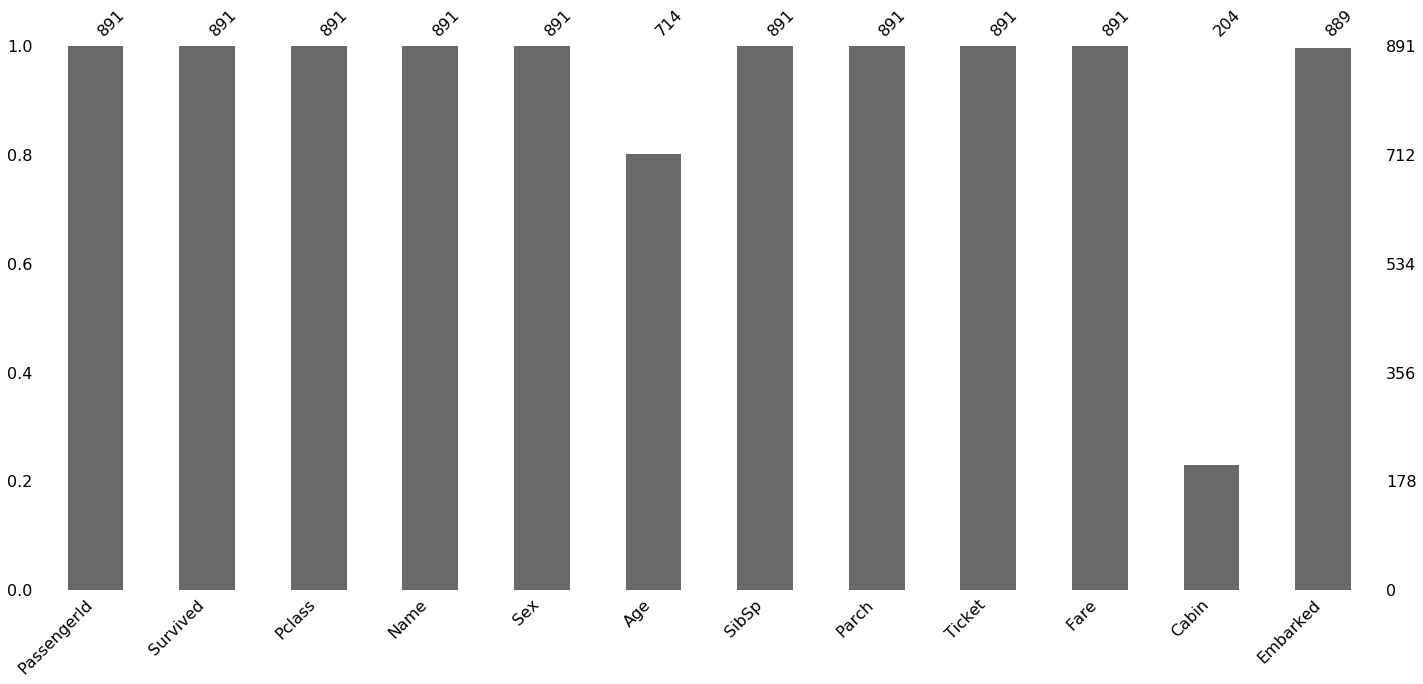

In [16]:
ms.bar(data)

# Unique value

- 동명이인 없음
- 성별 남,녀
- 티켓넘버 중복있음
- Cabin과 탑승항구 전처리가 필요해보임
- 나이가 1세가 안되는 사람이 있음. 아직 한살이 되지 않은 것 같음.
    - 나이는 int로 변환할 것

In [70]:
for col in data.columns:
    try:
        label = np.unique(data[col])
        print('='*50)
        print('{} length: {}'.format(col,len(label)))
    except:
        label = np.unique(data[col].apply(lambda x: str(x)))
        print('='*50)
        print('{} length: {}'.format(col,len(label)))

PassengerId length: 891
Survived length: 2
Pclass length: 3
Name length: 891
Sex length: 2
Age length: 265
SibSp length: 7
Parch length: 7
Ticket length: 681
Fare length: 248
Cabin length: 148
Embarked length: 4


In [87]:
cols = ['Survived','Pclass', 'Sex', 'SibSp', 'Parch']
for col in cols:
    label = np.unique(data[col])
    print('='*50)
    print('{}: {}'.format(col, label))

Survived: [0 1]
Pclass: [1 2 3]
Sex: ['female' 'male']
SibSp: [0 1 2 3 4 5 8]
Parch: [0 1 2 3 4 5 6]


In [20]:
np.unique(data.Age)

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

# Preprocessing

## 결측값 처리

In [143]:
data.Age[data.Age.isnull()] = 99

C:\Users\wogur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
data2.Embarked = data2.Embarked.apply(lambda x: None if x == 'nan' else x)
data2 = data.dropna(subset=['Age','Embarked'])
data2.shape

C:\Users\wogur\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(889, 12)

## 변수제외

In [145]:
data3 = data2.drop(['Cabin','Name','Ticket','PassengerId'], axis=1)
data3.shape

(889, 8)

In [146]:
data3.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Dummy transform

In [147]:
cat_features = ['Sex','Embarked']
dummies = pd.DataFrame()
for col in cat_features:
    dummy = pd.get_dummies(data3[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy], axis=1)
    data3 = data3.drop(col,axis=1)
data3 = pd.concat([data3,dummies], axis=1)

In [148]:
data3.shape

(889, 9)

In [149]:
data3.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [150]:
data3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Convert type

In [151]:
data3.Age = data3.Age.astype(int)
data3.Age.dtype

dtype('int32')

# Target

In [152]:
label, cnt = np.unique(data['Survived'],return_counts=True)
print(label)
print(cnt)

[0 1]
[549 342]


# Split data

In [153]:
x_data = data3.drop('Survived', axis=1)
y_data = data3.Survived

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=s_size, random_state=seed)

# LogisticRegression

In [154]:
model = LogisticRegression(
            random_state=seed,
            max_iter=1000,
            verbose=2
)

In [155]:
model.fit(X=x_train, y=y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=223, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

(array([59., 54., 27., 23.,  8., 11., 19., 20., 15., 31.]),
 array([0.04565017, 0.13459093, 0.22353169, 0.31247244, 0.4014132 ,
        0.49035396, 0.57929472, 0.66823547, 0.75717623, 0.84611699,
        0.93505775]),
 <a list of 10 Patch objects>)

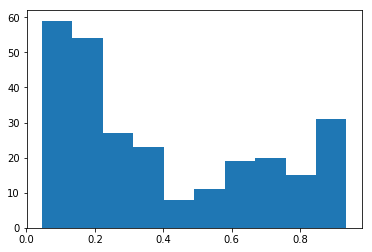

In [156]:
prob = model.predict_proba(X=x_test)[:,1]
plt.hist(prob)

# Evaluation

In [157]:
# AUROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

i = np.arange(len(tpr))
roc = pd.DataFrame({'tf': pd.Series(tpr - (1 - fpr), index=i), 'thresholds': pd.Series(thresholds, index=i)})
roc_t = roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

threshold = list(roc_t['thresholds'])
pred = [1 if i > threshold else 0 for i in prob]

In [216]:
roc[roc.thresholds==threshold]

,tf,thresholds
32,-0.002453,0.366262


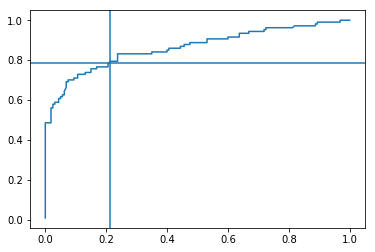

In [218]:
plt.plot(fpr, tpr, '-')
plt.axhline(tpr[32])
plt.axvline(fpr[32])

In [158]:
threshold

[0.3662619979499872]

In [159]:
metrics.accuracy_score(y_pred=pred, y_true=y_test)

0.7902621722846442

# Submission

In [136]:
test_set = pd.read_csv('../dataset/test.csv')
test_set.shape

(418, 11)

## Test set preprocessing

- Test set도 training set과 마찬가지로 전처리가 필요하다

Train set 과 마찬가지로 Age와 Cabin에 결측값이 있고, Fare에서 결측값이 1개 등장했다.

In [137]:
np.sum(test_set.isnull())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [138]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 결측값 처리

In [ ]:
test_set2.Age[test_set2.Age.isnull()] = 99
test_set2.Age = test_set2.Age.astype(int)
test_set2.Age.dtype

In [226]:
test_set2.Fare[test_set2.Fare.isnull()]

152   NaN
Name: Fare, dtype: float64

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

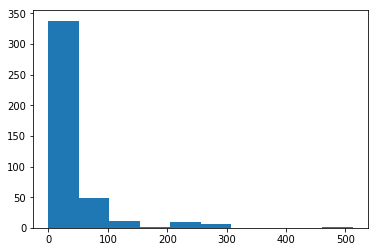

In [227]:
fare = test_set2.Fare.drop(152)
plt.hist(fare)

In [228]:
test_set2.Fare[test_set2.Fare.isnull()] = np.median(test_set2.Fare.drop(152))

C:\Users\wogur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 변수제외

In [219]:
test_set2 = test_set.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
print(test_set2.shape)
print(test_set2.columns)

(418, 7)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


### Dummy transform

In [169]:
cat_features = ['Sex','Embarked']
dummies = pd.DataFrame()
for col in cat_features:
    dummy = pd.get_dummies(test_set2[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy], axis=1)
    test_set2 = test_set2.drop(col,axis=1)
test_set2 = pd.concat([test_set2,dummies], axis=1)

In [229]:
print('Shape: ',test_set2.shape)
print()
print(np.sum(test_set2.isnull()))
test_set2.head()

Shape:  (418, 7)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


## Predict

In [191]:
prob = model.predict_proba(X=test_set2)[:,1]
len(prob)

418

In [192]:
pred = [1 if i > threshold else 0 for i in prob]

In [194]:
pd.DataFrame({'PassengerId':test_set.PassengerId, 'Survived':pred}).to_csv('../dataset/submit1.csv', index=False)